# Accessing url images

In [3]:
import cv2 as cv

In [4]:
import numpy as np

import urllib.request
url = "https://wallpapers.com/images/featured/full-hd-car-cpncxfsj9u9zu14k.jpg"
url_response = urllib.request.urlopen(url)
img = cv.imdecode(np.array(bytearray(url_response.read()),
                           dtype=np.uint8), -1)
resized_image = cv.resize(img, (640, 480))
cv.imshow("IMAGE",resized_image)
k = cv.waitKey(0)

# image operations

In [5]:
px = img[100,100]
print( px )

[ 9 13  8]


In [6]:
blue = img[100,100,0]
print( blue )

9


# Adding white patch to image

In [9]:
img[100:500,100:500] = [255,255,255]
print( img[100,100] )

[255 255 255]


In [11]:
cv.imshow("IMAGE",img)
k = cv.waitKey(0)

In [11]:
print( img.shape )

(1080, 1920, 3)


In [12]:
print( img.size )

6220800


In [13]:
print( img.dtype )

uint8


# Adding image roi patch to image

In [15]:
h,w,c=img.shape

In [17]:
tyre = img[(h//2)-100:(h//2)+100, (w//2)-100:(w//2)+100]

In [19]:
img[200:400, 200:400] = tyre

In [21]:
cv.imshow("IMAGE",img)
k = cv.waitKey(0)

# Splitting image

In [25]:
b,g,r = cv.split(img)

In [26]:
img = cv.merge((b,g,r))

In [27]:
cv.imshow("IMAGE",img)
k = cv.waitKey(0)

# Borders

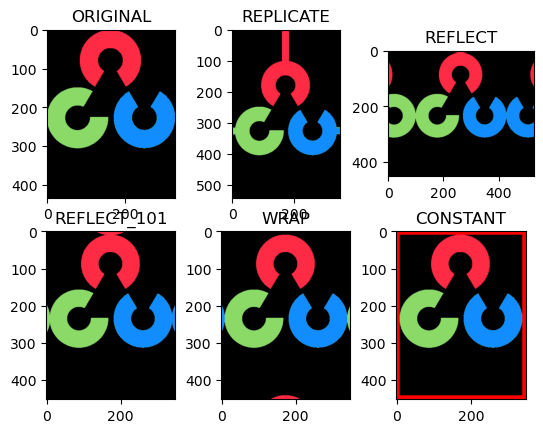

In [11]:

import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img=cv.imread("images//OpenCV.png")
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)

replicate = cv.copyMakeBorder(img,100,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img,10,10,100,100,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

# Image Blending

In [10]:
import matplotlib.pyplot as plt

img1 = cv.imread('images//birds//003_parrot-3601194_640.jpg')
img2 = cv.imread('images//birds//004_kingfisher-2046453_640.jpg')
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"

dst = cv.addWeighted(img1,0.9,img2,0.2,0)



cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()

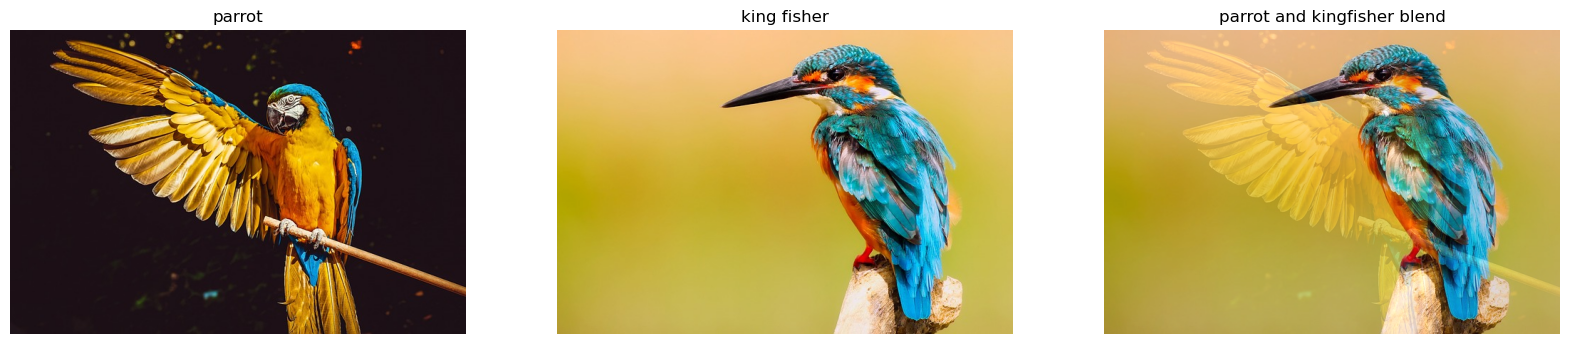

In [6]:
import matplotlib.pyplot as plt
import numpy as np


img11=cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img12=cv.cvtColor(img2,cv.COLOR_BGR2RGB)
dst1=cv.cvtColor(dst,cv.COLOR_BGR2RGB)

plt.figure(figsize=(20, 12))
#The general syntax for plt.subplot() is plt.subplot(nrows, ncols, index)
plt.subplot(231)
plt.imshow(img11)
plt.title("parrot")
plt.axis("off")
plt.subplot(232)
plt.imshow(img12)
plt.title("king fisher")
plt.axis("off")
plt.subplot(233)
plt.imshow(dst1)
plt.title("parrot and kingfisher blend")
plt.axis("off")
plt.show()

# Bitwise Operations

In [12]:
# Load two images
img1 = cv.imread('images//birds//003_parrot-3601194_640.jpg')
img2 = cv.imread('opencvlogo.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()